<a href="https://colab.research.google.com/github/kimcaprio/tinyml/blob/master/Hello_World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Tensorflow==2.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

     |████████████████████████████████| 86.3MB 52kB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 3.8MB 51.6MB/s 
     |████████████████████████████████| 450kB 49.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=74469e61e88490c61dbe97c7b8b8febea55960292c6bc36f177f74c382731ca4
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tenso

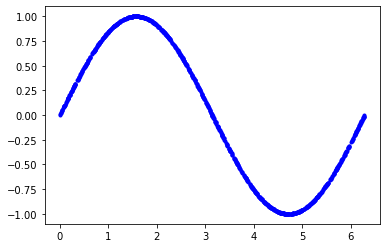

In [2]:
# Make sample data as below value
SAMPLES = 1000

SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# 사이파 진폭의 범위인 0~2pi 내에서 균일하게 분포된 난수 집합을 생성
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

# 값을 섞어서 생성된 값들이 순서를 따르지 않도록 한다
np.random.shuffle(x_values)

# 해당 사인 값을 계산
y_values = np.sin(x_values)

# 데이터를 그래프로 그린다. 'b.' 인수는 라이브러리에 점을 파란색으로 출력하도록 지시
plt.plot(x_values, y_values, 'b.')
plt.show()

(1000,)
<class 'numpy.ndarray'>


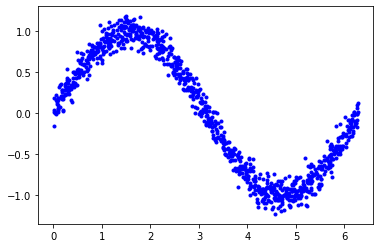

In [3]:
print(y_values.shape)
print(type(y_values))
# 각 y값에 임의로 작은 숫자를 추가한다
y_values += 0.1 * np.random.randn(*y_values.shape)

# 그래프 생성
plt.plot(x_values, y_values, 'b.')
plt.show()

600 800


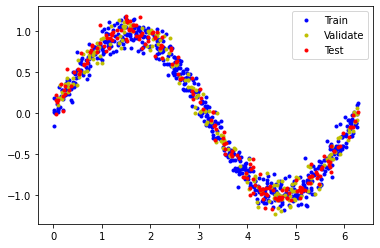

In [4]:
# 훈련 60%, 테스트 20%, 검증 20%
# 각 항목의 인덱스를 계산
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
print( TRAIN_SPLIT, TEST_SPLIT)

#np.split을 사용하여 데이터를 세 부분으로 나눔
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
#print(x_train.shape, x_validate.shape, x_test.shape)
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# 분할한 데이터를 합쳣을 때 원래 사이즈와 같아지는지 확인
assert(x_train.size + x_validate.size + x_test.size) == SAMPLES

# 분할한 각 데이터들을 다른 색상으로 그래프에 표시
plt.plot(x_train, y_train, 'b.', label='Train')
plt.plot(x_validate, y_validate, 'y.', label='Validate')
plt.plot(x_test, y_test, 'r.', label='Test')
plt.legend()
plt.show()

In [16]:
# 간단한 모델 구조를 만들기 위해 케라스를 사용
from tensorflow.keras import layers

#from tf import layers
model_1 = tf.keras.Sequential()

model_1.add(layers.Dense(16, activation='relu', input_shape = (1,)))

model_1.add(layers.Dense(1))

# 표준 옵티마이저와 손실을 사용하여 회기 모델을 컴파일
model_1.compile(optimizer = 'rmsprop', loss='mse', metrics = ['mae'])

# 요약된 모델 설계를 출력
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 모델 학습 
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16, validation_data = (x_validate, y_validate))

Train on 600 samples, validate on 200 samples
Epoch 1/1000
600/600 [==============================] - 1s 1ms/sample - loss: 0.7887 - mae: 0.7848 - val_loss: 0.5824 - val_mae: 0.6867
Epoch 2/1000
600/600 [==============================] - 0s 115us/sample - loss: 0.4883 - mae: 0.6194 - val_loss: 0.4742 - val_mae: 0.6056
Epoch 3/1000
600/600 [==============================] - 0s 105us/sample - loss: 0.4208 - mae: 0.5637 - val_loss: 0.4259 - val_mae: 0.5631
Epoch 4/1000
600/600 [==============================] - 0s 113us/sample - loss: 0.3822 - mae: 0.5367 - val_loss: 0.3861 - val_mae: 0.5356
Epoch 5/1000
600/600 [==============================] - 0s 109us/sample - loss: 0.3472 - mae: 0.5115 - val_loss: 0.3512 - val_mae: 0.5097
Epoch 6/1000
600/600 [==============================] - 0s 110us/sample - loss: 0.3173 - mae: 0.4885 - val_loss: 0.3196 - val_mae: 0.4852
Epoch 7/1000
600/600 [==============================] - 0s 105us/sample - loss: 0.2891 - mae: 0.4684 - val_loss: 0.2935 - val_ma

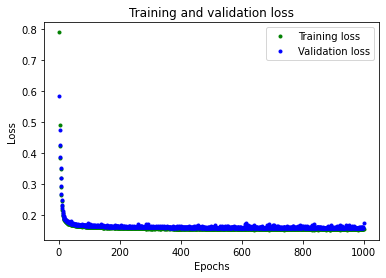

In [22]:
# 히스토리 개체 그래프로 나타내기
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

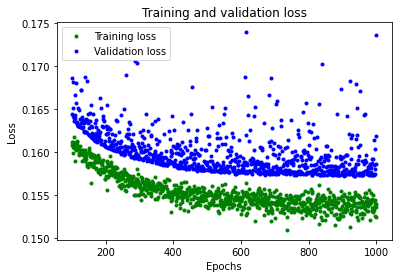

In [26]:
# 그래프 가독성을 위해 처음 100개의 에폭을 건너뛰자
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

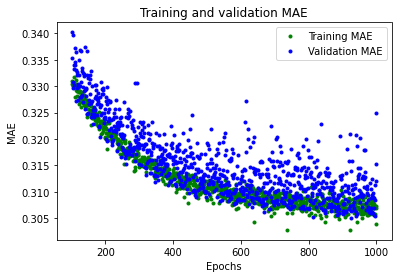

In [28]:
# 예측에서 오차를 측정하는 또 다른 방법인 평균 절대 오차 그래프를 그려보자
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

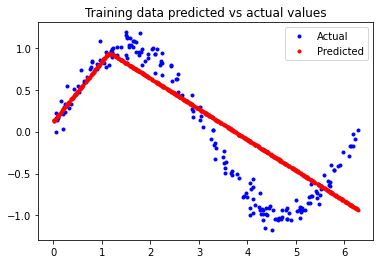

In [31]:
# 모델을 사용하여 검증 데이터로부터 예측값 생성
predictions = model_1.predict(x_train)

#테스트 데이터와 함께 예측값을 그래프로 표현
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label = 'Actual')
plt.plot(x_train, predictions, 'r.', label = 'Predicted')
plt.legend()
plt.show()

# 보여지는 예측은 매우 선형적이며 데이터에 매우 대략적으로만 모델이 생성되고 있음.